#### The Monthly Car Sales dataset describes the number of car sales in Quebec, Canada between 1960 and 1968.

#### This tutorial is originally from https://machinelearningmastery.com/seasonal-persistence-forecasting-python/


C:\Users\Utilisateur\Anaconda3\lib\site-packages\pandas\core\series.py:4137: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64


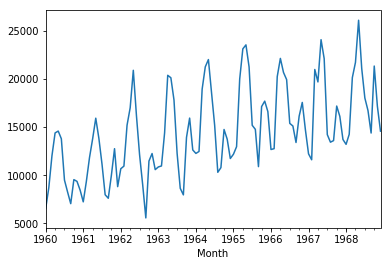

In [8]:
from pandas import Series
from matplotlib import pyplot as plt

# load dataset
series = Series.from_csv('car-sales.csv', header = 0)

# display some data
print(series.head(5))

# inline plot of dataset
series.plot()
plt.show()

#### The prior 24 months of data will be held back as test data. 
#### We will investigate seasonal persistence with a sliding window from 1 to 5 years

Years=1, RMSE: 1997.732
Years=2, RMSE: 1914.911
Years=3, RMSE: 1803.630
Years=4, RMSE: 2099.481
Years=5, RMSE: 2522.235


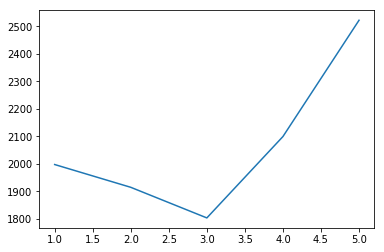

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import mean

# load dataset
#series = Series.from_csv('car-sales.csv', header=0)

# now prepare data
X = series.values

train, test = X[0: -24], X[-24:]

# Evaluate mean of different number of years
years = [1, 2, 3, 4, 5]
scores = list()
for year in years:
    # walk forward validation
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        obs = list()
        for y in range(1, year+1):
            obs.append(history[-(y*12)])
            
        # now we make prediction
        yhat = mean(obs)
        predictions.append(yhat)
        
        # observation
        history.append(test[i])
        
    # report the performance
    rmse = sqrt(mean_squared_error(test, predictions))
    scores.append(rmse)
    print('Years=%d, RMSE: %.3f' % (year, rmse))
pyplot.plot(years, scores)
plt.show()

#### The results above suggest that taking the average from the last three years is a good starting model with an RMSE of 1803.630 car sales. This is shown in the plot 